# Data Analysis

After extracting and cleaning the data, the next step is to visualize it to gain insights and communicate findings effectively. But before starting, let's recap the different columns that we have :

- `region`, `country`, `city`, `airport_id` : the location to where we're travelling (from Casablanca)
- `departure_tod`, `arrival_tod` : departure/arrival time of the day (Night, Morning,...)
- `stops` : number of stops the plane does
- `duration_s_` : flight duration by seconds
- `coastline` : coast length / area ratio
- `gdp` : GDP per capita 
- `migration`, `infant_mortality` : net migration and infant mortality rate
- `population`, `pop_density`, `area` : destination population, its density and area
- `birthrate`, `deathrate` : the birth/death rate in the destination's country
- `distance` : areal distance between Casablanca and the destination
- `departure_time`, `arrival_time`, `duration`, `airline`, `price` : are self explanatory

Let's start by exploring the different features :

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("colorblind")

In [9]:
df = pd.read_csv("DATA.csv")

### I. Destinations

We have 651 destination around the world.


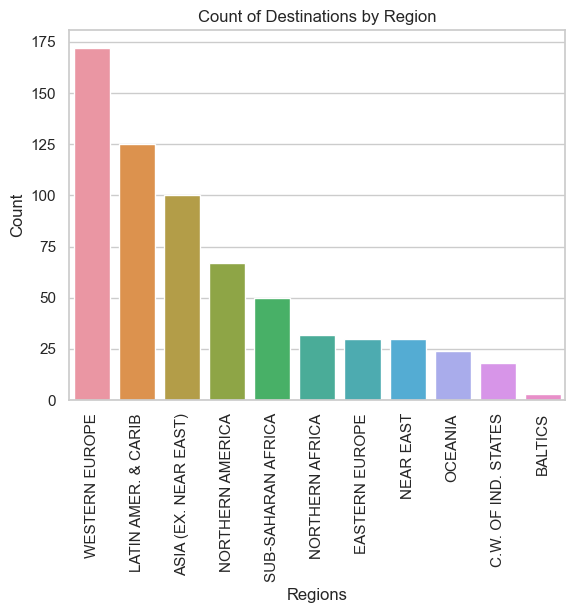

In [24]:
# Let's see how many destinations we have, and how they are distibuted around the world
destinations = df[['region', 'country', 'city']].drop_duplicates()

print(f'We have {len(destinations)} destination around the world.')

ax = sns.countplot(data=destinations,
                   x='region',
                   order=destinations['region'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Count of Destinations by Region')

plt.show()

The majority of the destinations are located in the western Europe, which is obvious due to the high traffic between Morocco and European nations (especially France and Spain). The Baltic region has the least number of destinations and that's because it's only 3 countries (Latvia, Lithuania and Estonia). Now let's how far are our destinations.

The closest destination is Rabat, Morocco by 86.05 Km.
The farest destination is Auckland, New Zealand by 19593.31 Km.


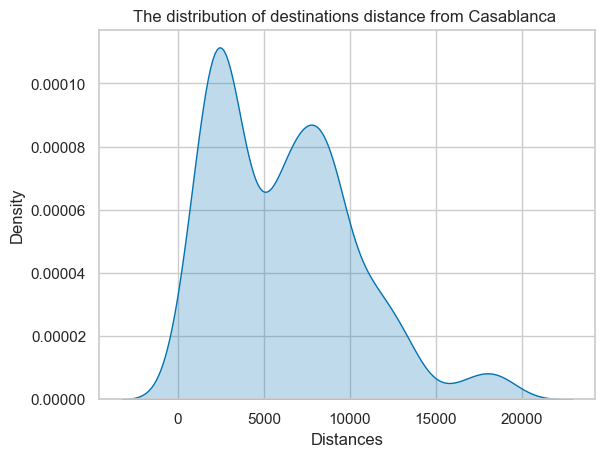

In [42]:
distances = df[['city', 'country', 'distance']].drop_duplicates()

close_city, close_country, how_close = distances.loc[distances['distance'].idxmin()].values
farest_city, farest_country, how_far = distances.loc[distances['distance'].idxmax()].values

print(f'The closest destination is {", ".join([close_city, close_country])} by {how_close} Km.')
print(f'The farest destination is {", ".join([farest_city, farest_country])} by {how_far} Km.')

sns.kdeplot(data=distances,
            x='distance',
            fill=True)

plt.xlabel('Distances')
plt.title('The distribution of destinations distance from Casablanca ')

plt.show()

### II. Time

<AxesSubplot: xlabel='duration_s_', ylabel='Density'>

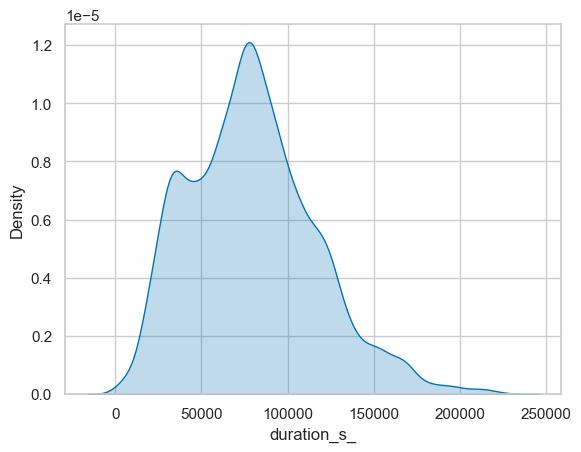

In [43]:
sns.kdeplot(data=df,
            x='duration_s_',
            fill=True)